In [1]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# [1]
fn <- "/content/32140.txt"         # 基礎演習S
readLines(fn)				    # ファイルの内容を画面に表示

[1] "＜到達目標＞1.統計学の基本的な概念を理解し説明できる．(知識体系に基づく思考と知の創出)2.1年次の「入門プログラミング」「情報分析基礎」「情報分析演習」で学習した内容を発展させ、コンピューターで情報を取り扱う際の論理的・数理的思考能力、数量的スキル、科学的思考法の基礎を身につける．(知識体系に基づく思考と知の創出)3.ソフトウェアを使って，目的に合った情報をデータから効率よく抽出できる．(知識体系に基づく思考と知の創出)4.関連する情報技術や分析手法の知識・技能を適切に活用して思考し，分析した事柄をまとめ，分かりやすく自らの言葉で説明できる．(態度・志向性)＜講義概要＞コンピューターの処理速度や記憶装置の能力向上に伴い、IoT(InternetofThings)や「ビッグデータ」といった分野に対する関心が急速に高まっている．一方で、こうしたハードウェアの技術進歩に対応して大量の情報を取り扱うことができる能力が今日の情報社会では求められている．大量の情報はそのままでは単なる数字・文字の羅列であり、何の役にも立たない．使いこなすには、仮説の立案から始まり、データの収集、前処理、ソフトウェアへのデータ入力、データの可視化、ソフトウェアでの計算、結果の解釈といった一連の流れを身につける必要がある．この講義ではこうした一連の流れを体験することで、コンピューターで情報を取り扱う際の論理的・数理的思考能力、数量的スキル、科学的思考法の基礎を身につける．なお、Excel，Rなどのソフトウェアを用いるが、講義の目的はソフトウェアの利用方法を学ぶことではなく、ソフトウェアを使って大量の情報を取り扱うことができる能力を身につけることにある．＜講義計画＞１．データの入出力とデータのマネジメント、Excelを用いたシミュレーション２．データの収集のために～ExcelVBA～３．データの記述（１）～１変数と記述統計４．データの記述（２）～２変数と記述統計５．データの分析のために（１）～母集団と標本６．データの分析のために（２）～大数の法則と中心極限定理７．データの分析（１）～統計的仮説検定８．データの分析（２）～回帰分析９．WEB上のデータ取得１－正規表現とXPath１０．WEB上のデータ取得２－実習１１．テキストデータの分析１－形態素解析，WordCloudと共起性１２．テキストデータの分析２－実習１３．地理空間データの表示１－Shapeファイルと地図描画１４．地理空間データの表示２ー実習１５．総合演習＜授業時間外の予習・復習・課題＞原則的に毎回週次課題が出題され，翌週の授業開始時に提出が求められる。授業時間内で作業が終わらない場合は，授業時間外で作業することが求められる．＜課題に対するフィードバックの方法＞googleclassroom等を用いて提出物を添削するか，点数を各人に示すなどしてフィードバックを行う． "

In [3]:
# [2]
#gc(); gc()              # ガベージコレクション
dat <- docDF(fn, type = 1, pos = c("名詞","形容詞","動詞"))
#dat
names(dat)
names(dat)[4] <- "FREQ" # 列名の4番目を"FREQ"に変更
names(dat)
class(dat); nrow(dat)   # datのクラスと行数表示
head(dat, 5); tail(dat, 5)   # datの最初の5要素，最後の5要素
dat[100:104,]    # datの100行目からの5要素

file_name =  /content/32140.txt opened
number of extracted terms = 205
now making a data frame. wait a while!



[1] "TERM"      "POS1"      "POS2"      "32140.txt"

[1] "TERM" "POS1" "POS2" "FREQ"

[1] "data.frame"

[1] 205

,TERM,POS1,POS2,FREQ
,<chr>,<chr>,<chr>,<int>
1,(,名詞,サ変接続,5
2,),名詞,サ変接続,4
3,)＜,名詞,サ変接続,1
4,.,名詞,サ変接続,4
5,1,名詞,数,2


,TERM,POS1,POS2,FREQ
,<chr>,<chr>,<chr>,<int>
201,６,名詞,数,1
202,７,名詞,数,1
203,８,名詞,数,1
204,９,名詞,数,1
205,～,名詞,サ変接続,2


,TERM,POS1,POS2,FREQ
,<chr>,<chr>,<chr>,<int>
100,実習,名詞,サ変接続,3
101,対応,名詞,サ変接続,1
102,年,名詞,接尾,1
103,形態素,名詞,一般,1
104,役,名詞,一般,1


In [4]:
# [3]
# Stop Wordは，いろいろな考え方があり得るところ（以下は例）
# (1) 記号　(, ), :, ? など（半角・全角），特に句読点（パンクチュエーション）
# (2) 数字（半角・全角）　※年代などもあるが
# (3) 語尾：的, 権, 法, 化, 等, 市
# (4) アルファベット1文字（大文字・小文字・半角・全角）※「R」などもあるが
# (5) 非自立語：いる，こと，ため
# (6) どのシラバスにも共通するもの：到達/目標, DP, 講義/計画　※今回略
# (7) 一般的・抽象的すぎるもの：する, できる, ある, 代名詞　　※今回略
# -------------------------------------------------------------------
# (1)パンクチュエーション削除
# 参照：「R における正規表現」の「拡張正規表現 (既定動作)」の項
#       http://www.okadajp.org/RWiki/?R%20における正規表現

ne <- grep("[[:punct:]]+", dat$TERM)      # dat$TERM中のパンクチュエーションの位置（行番号）
dat$TERM[ne]
dat <- dat[-ne,]      # neの行削除　※neが空（要素数0）だとエラーになるので注意

# (4) アルファベット1文字削除
ne <- grep("^([[:upper:]]|[[:lower:]])$", dat$TERM)
length(ne)
dat$TERM[ne]
dat <- dat[-ne,]
# (2,3,5) 数・接尾・非自立を削除
ne <- which(dat$POS2 %in% c("数", "非自立", "接尾"))
dat$TERM[ne]
dat <- dat[-ne,]
dat$TERM

[1] "("    ")"    ")＜"  "."    "）～" "－"   "～"

[1] 1

[1] "R"

[1] "1"      "2"      "3"      "4"      "いる"   "こと"   "せる"   "ため"  
 [9] "やすい" "られる" "れる"   "上"     "内"     "化"     "外"     "学"    
[17] "年"     "性"     "時"     "次"     "法"     "物"     "的"     "等"    
[25] "際"     "０"     "１"     "２"     "３"     "４"     "５"     "６"    
[33] "７"     "８"     "９"

[1] "Excel"            "Excel"            "ExcelVBA"        
  [4] "InternetofThings" "IoT"              "Shape"           
  [7] "WEB"              "WordCloud"        "XPath"           
 [10] "googleclassroom"  "ある"             "する"            
 [13] "つける"           "できる"           "まとめる"        
 [16] "よい"             "コンピューター"   "シミュレーション"
 [19] "スキル"           "ソフトウェア"     "テキスト"        
 [22] "データ"           "ハードウェア"     "ビッグ"          
 [25] "ファイル"         "フィードバック"   "プログラミング"  
 [28] "マネジメント"     "ー"               "一連"            
 [31] "中心"             "予習"             "事柄"            
 [34] "今日"             "仮説"             "伴う"            
 [37] "体系"             "体験"             "何"              
 [40] "作業"             "使いこなす"       "使う"            
 [43] "入出力"           "入力"             "入門"            
 [46] "共起"             "内容"             "処理"            
 [49] "出題"             "分かる"           "分析"            
 [52] "分野"             "利用"             "到達"            
 [55] "創出"             "効率"             "原則"            
 [58] "収集"             "取り扱う"         "取得"            
 [61] "可視"             "各人"             "合う"            
 [64] "向上"             "回帰"             "地図"            
 [67] "地理"             "基づく"           "基本"            
 [70] "基礎"             "場合"             "変数"            
 [73] "大数"             "大量"             "始まる"          
 [76] "学ぶ"             "学習"             "定理"            
 [79] "実習"             "対応"             "形態素"          
 [82] "役"               "復習"             "必要"            
 [85] "志向"             "思考"             "急速"            
 [88] "情報"             "態度"             "手法"            
 [91] "技能"             "技術"             "抽出"            
 [94] "授業"             "描画"             "提出"            
 [97] "数字"             "数理"             "数量"            
[100] "文字"             "方法"             "時間"            
[103] "検定"             "極限"             "概念"            
[106] "概要"             "標本"             "正規"            
[109] "母集団"           "毎回"             "求める"          
[112] "法則"             "活用"             "流れ"            
[115] "添削"             "演習"             "点数"            
[118] "理解"             "用いる"           "発展"            
[121] "目標"             "目的"             "知"              
[124] "知識"             "示す"             "社会"            
[127] "科学"             "空間"             "立つ"            
[130] "立案"             "終わる"           "結果"            
[133] "統計"             "総合"             "羅列"            
[136] "翌週"             "能力"             "自ら"            
[139] "行う"             "表現"             "表示"            
[142] "装置"             "解析"             "解釈"            
[145] "言葉"             "計画"             "計算"            
[148] "記憶"             "記述"             "説明"            
[151] "課題"             "論理"             "講義"            
[154] "身"               "速度"             "週"              
[157] "進歩"             "適切"             "開始"            
[160] "関心"             "関連"             "高まる"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘BH’, ‘Rcpp’, ‘tm’, ‘slam’


Loading required package: RColorBrewer

Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(14, 2), :
“データ could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(14, 2), :
“思考 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(14, 2), :
“ソフトウェア could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(14, 2), :
“分析 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(14, 2), :
“情報 could not be fit on page. It will not be plotted.”


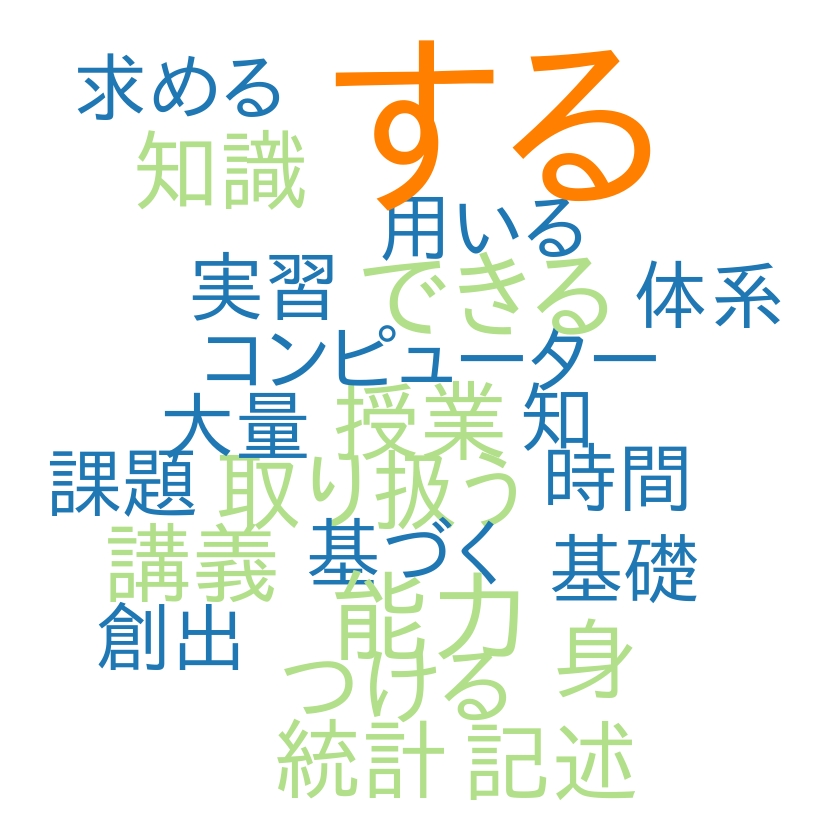

In [6]:
# [4]
install.packages(c("wordcloud"), dependencies=TRUE)
library('wordcloud')
# wordcloud(res$Term, res$Freq, min.freq = 3, scale = c(8, 1.1), colors = brewer.pal(8, "Dark2"))
wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(14, 2), colors = brewer.pal(12, "Paired"))
# ヒント：wordcloudのscaleやbrewer.palのパラメータを適当に変えて見やすいものを探そう．